## Гауссово распределение, линейный дискриминантный анализ и наивный байес

### 1. Многомерное гауссово распределение
Создайте случайную выборку данных с двумерным гауссовым распределением. Для этого сперва сделайте два вектора из двух одномерных распределений с разными стандартными отклонениями $\sigma_1$ и $\sigma_2$, как показано ниже:  
``` python
import numpy as np

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)
```
После чего сделайте матрицу поворота на угол $\alpha$ и с помощью неё поверните набор точек в пространстве.  
Посчитайте матрицу ковариации для сгенерированных точек.  
Нарисуйте полученное облако точек и сравните его с облаком точек, полученных с помощью готовой функции:  `np.random.multivariate_normal()`


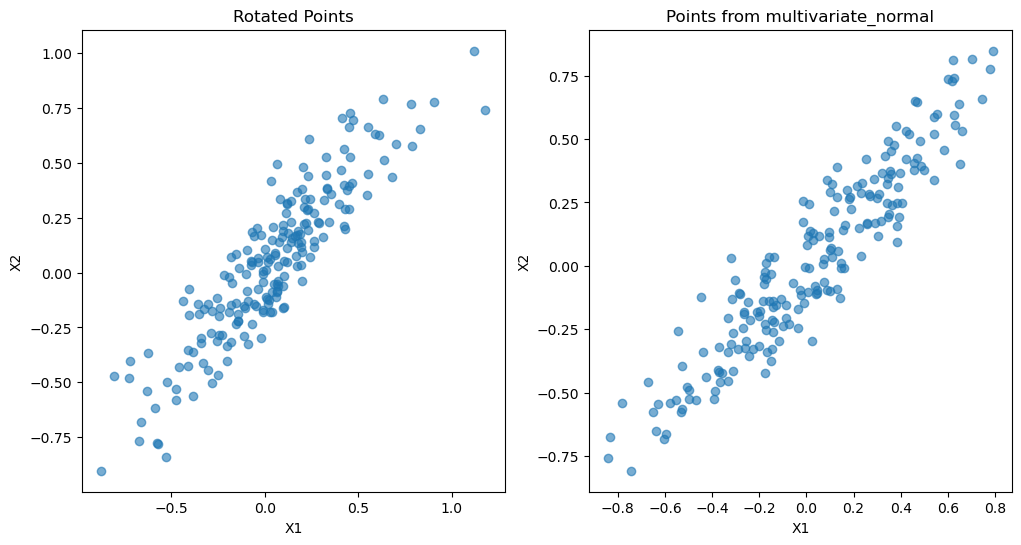

Covariance Matrix of Rotated Points:
[[0.11933294 0.10911717]
 [0.10911717 0.12278497]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

M = 200  # 样本数量
sigma1 = 0.1  # 第一个维度的标准差
sigma2 = 0.5  # 第二个维度的标准差
x1 = np.random.randn(M, 1) * sigma1  # 生成标准正态分布的样本，并乘以标准差
x2 = np.random.randn(M, 1) * sigma2  # 同上
X = np.concatenate((x1, x2), axis=1)  # 将两个一维向量拼接成一个二维数组

theta = np.pi / 4  # 旋转角度为 45 度
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])
X_rotated = X @ rotation_matrix  # 使用旋转矩阵对数据点进行旋转

cov_matrix = np.cov(X_rotated.T)

plt.figure(figsize=(12, 6))

# 绘制旋转后的数据点
plt.subplot(1, 2, 1)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.6)
plt.title('Rotated Points')
plt.xlabel('X1')
plt.ylabel('X2')

# 使用 np.random.multivariate_normal() 生成类似的数据点
mean = np.zeros(2)  # 均值为零
cov = [[sigma1**2, 0], [0, sigma2**2]]  # 协方差矩阵
X_multivariate = np.random.multivariate_normal(mean, cov, M)
X_multivariate_rotated = X_multivariate @ rotation_matrix

# 绘制使用 multivariate_normal 生成的数据点
plt.subplot(1, 2, 2)
plt.scatter(X_multivariate_rotated[:, 0], X_multivariate_rotated[:, 1], alpha=0.6)
plt.title('Points from multivariate_normal')
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

print("Covariance Matrix of Rotated Points:")
print(cov_matrix)

### 2. Плотность вероятности гауссового распределения
В общем виде $n$-мерное гауссово распределение имеет вид:  
$$p(x) = \frac{1}{(\sqrt{2\pi})^n \sqrt{detC}} e^{-\frac{1}{2}(x-\mu)^TС^{-1}(x-\mu)} \tag{1}$$  
где $x\in{R^n}$, $\mu\in{R^n}$ - среднее значение, $C$ - матрица ковариации.  

Сгенерируйте набор точек в двумерном пространстве (как делали в пункте 1 или другим способом). Посчитайте для них среднее значение и матрицу ковариации $\mu$ и $C$. Для оценки плотности вероятности (probability density function - `pdf`) гауссового распределения в произвольной точке используйте `scipy.stats.multivariate_normal` 
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html), либо можете посчитать вручную.  

Визуализируйте набор точек и плотность вероятности, для чего изобразите точки одним цветом, а фон раскрасьте в соответсвии с плотностью вероятности, для чего можете использовать пример ниже:  

``` python
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=[0,0], cov=[[0.3, 0], [0, 0.1]])
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, m.pdf(pp).reshape(XX.shape), levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
```

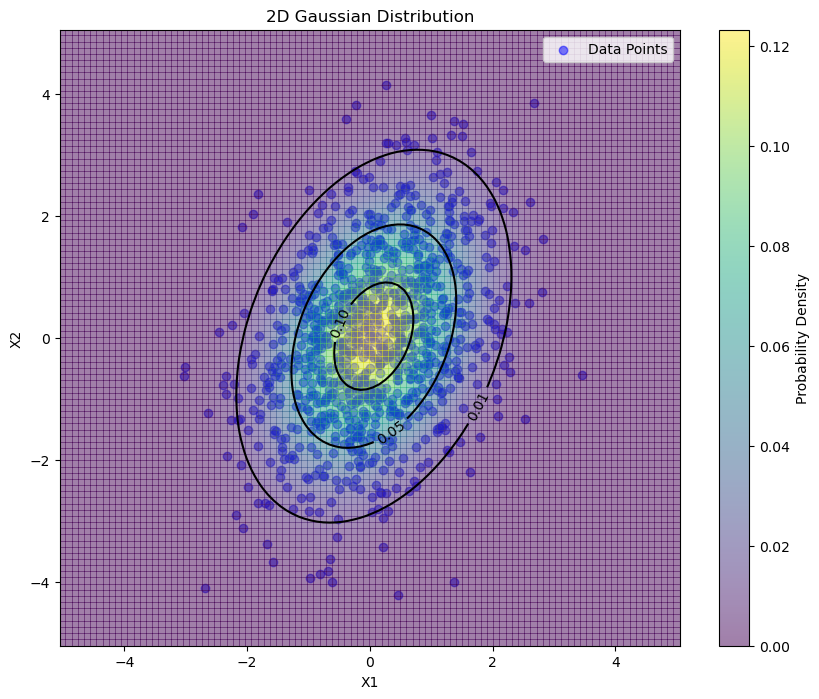

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 生成二维空间中的数据点
np.random.seed(42)
mean = [0, 0]
cov = [[1, 0.5], [0.5, 2]]
data = np.random.multivariate_normal(mean, cov, 1000)

# 计算均值向量和协方差矩阵
mu = np.mean(data, axis=0)
C = np.cov(data.T)

# 定义网格以计算整个区域的概率密度
xx = np.linspace(-5, 5, 100)
yy = np.linspace(-5, 5, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.dstack((XX, YY)).reshape(-1, 2)

# 使用 multivariate_normal 计算概率密度
m = multivariate_normal(mean=mu, cov=C)
ZZ = m.pdf(pp).reshape(XX.shape)

# 可视化数据点和概率密度
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.5, label='Data Points')
plt.pcolor(XX, YY, ZZ, cmap='viridis', alpha=0.5)
plt.colorbar(label='Probability Density')

# 添加轮廓线
CS = plt.contour(XX, YY, ZZ, levels=[0.01, 0.05, 0.1, 0.2, 0.3], colors='black')
plt.clabel(CS, inline=1, fontsize=10)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Gaussian Distribution')
plt.legend()
plt.show()

### 3. Бинарная классификация

**Задание** 
Создайте случайный датасет, состоящий из двух классов $y\in{\{0, 1\}}$, а признаки имеют две координаты. Посчитайте для каждого класса среднее значение и матрицу ковариации $\mu_0, \mu_1$ и $C_0, C_1$.

Решение задачи классификации можно свести к оценке максимальной апостериорной вероятности (Maximum a posterior - MAP):
$$y = \underset{y\in{0,1}}{argmax} p(y|x) \tag{2}$$  
которая в свою очередь через теорему Байеса равна:  
$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} \tag{3}$$
В последней формуле вероятность p(y) называется априорной и не зависит от $x$ - оценить её можно просто как долю точек датасета принадлежащего заданному классу $y$. Вероятность p(x|y) называют правдоподобием (likelyhood). Обычно правдоподобие моделируется некоторой генерирующей моделью, например по формуле гаусса (1), и говорит насколько правдоподобно что точка с координатами $x$ могла быть "сгенерирована" в классе $y$. Знаменатель $p(x)$ в последней формуле не зависит от $y$, поэтому на него внимание не обращаем.  

Таким образом, для бинарной классификации, т.е. для оценки принадлежности некоторой точки $x$ к классу 0 или 1, нужно сравнить две величины:  
$$p(x|y=0)p(y=0) \overset{?}{<>} p(x|y=1)p(y=1) \tag{4}$$

**Задание**
Визуализируейте на одном рисунке датасет с точками обоих классов разными цветами. Раскрасьте фон изображения в соответствии с разностью левой и правой частей уравнения (4). Постройте на этом же рисунке разделяющую кривую, т.е. кривую соответствующую нулевой разнице между левой и правой частями. Для её построения используйте функции `plt.contour` с указанием конкретного уровня.

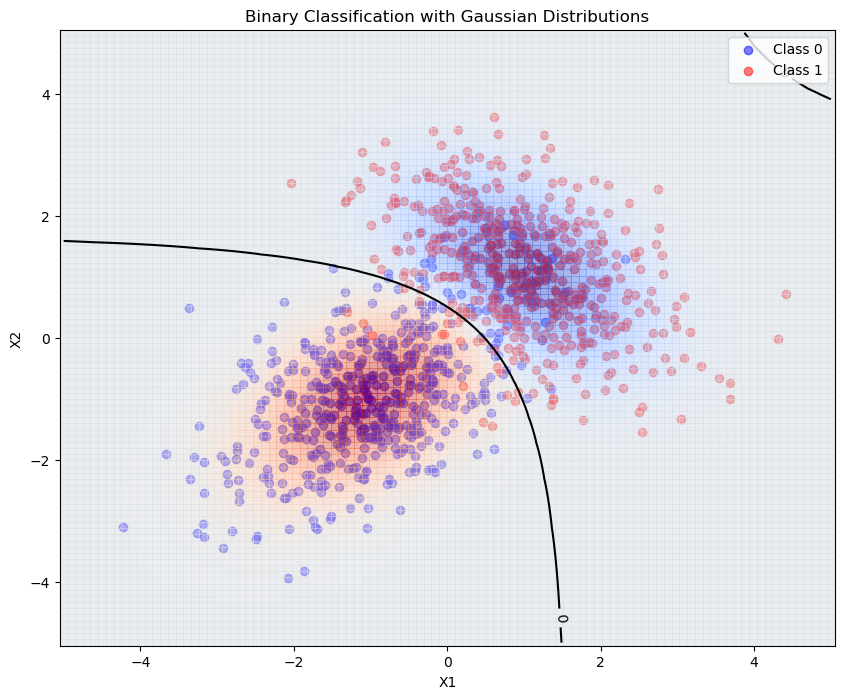

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 生成随机数据集
np.random.seed(42)
mean_0 = [-1, -1]
cov_0 = [[1, 0.5], [0.5, 1]]
mean_1 = [1, 1]
cov_1 = [[1, -0.5], [-0.5, 1]]

data_0 = np.random.multivariate_normal(mean_0, cov_0, 500)
data_1 = np.random.multivariate_normal(mean_1, cov_1, 500)

data = np.vstack((data_0, data_1))
labels = np.hstack((np.zeros(500), np.ones(500)))

# 计算每个类别的均值向量和协方差矩阵
mu_0 = np.mean(data_0, axis=0)
mu_1 = np.mean(data_1, axis=0)
C_0 = np.cov(data_0.T)
C_1 = np.cov(data_1.T)

# 计算先验概率
prior_0 = len(data_0) / len(data)
prior_1 = len(data_1) / len(data)

# 定义网格以计算整个区域的概率密度
xx = np.linspace(-5, 5, 100)
yy = np.linspace(-5, 5, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.dstack((XX, YY)).reshape(-1, 2)

# 使用 multivariate_normal 计算概率密度
m_0 = multivariate_normal(mean=mu_0, cov=C_0)
m_1 = multivariate_normal(mean=mu_1, cov=C_1)

# 计算似然概率
likelihood_0 = m_0.pdf(pp)
likelihood_1 = m_1.pdf(pp)

# 计算决策函数
decision_function = (likelihood_0 * prior_0) - (likelihood_1 * prior_1)
ZZ = decision_function.reshape(XX.shape)

# 可视化数据点和概率密度
plt.figure(figsize=(10, 8))
plt.scatter(data_0[:, 0], data_0[:, 1], c='blue', alpha=0.5, label='Class 0')
plt.scatter(data_1[:, 0], data_1[:, 1], c='red', alpha=0.5, label='Class 1')
plt.pcolor(XX, YY, ZZ, cmap='coolwarm', alpha=0.5)

# 绘制分类边界
CS = plt.contour(XX, YY, ZZ, levels=[0], colors='black')
plt.clabel(CS, inline=1, fontsize=10)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Binary Classification with Gaussian Distributions')
plt.legend()
plt.show()

### 4. LDA (linear discriminant analysis)

**Задание** Рассмотрите частный случай, когда для точек двух классов матрицы ковариации совпадают, т.е. $C_0=C_1$, но средние значения отличаются $\mu_0\neq\mu_1$. Выпишите явное выражение для разделяющей поверхности в этом случае. Визуализируйте такой случай аналогично предыдущему пункту. Про линейный и квадратичный дискриминантный анализ можете почитать здесь (https://scikit-learn.org/stable/modules/lda_qda.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii)

Реализуйте классификатор на основе метода линейного дискриминантного анализа по шаблону ниже. Данный алгоритм предполагает одинаковость матриц ковариации (т.е. считает одну общую матрицу ковариации, но разные средние) и использует линейное правило классификации. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```


In [16]:
import numpy as np
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        self.class_means = None
        self.overall_covariance = None
        self.priors = None
        self.discriminant_functions = None

    def fit(self, X, y):
        # 获取类别数量
        classes = np.unique(y)
        n_classes = len(classes)

        # 计算每个类别的均值向量
        self.class_means = []
        for c in classes:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            self.class_means.append(mean_c)
        
        # 计算总的协方差矩阵
        self.overall_covariance = np.zeros((X.shape[1], X.shape[1]))
        for c in classes:
            X_c = X[y == c]
            mean_c = self.class_means[c]
            self.overall_covariance += np.cov(X_c, rowvar=False)
        
        # 计算先验概率
        self.priors = []
        for c in classes:
            self.priors.append(np.mean(y == c))

    def predict(self, X):
        # 计算判别函数
        discriminant_values = []
        for i, x in enumerate(X):
            g_i = []
            for c in range(len(self.class_means)):
                mean_c = self.class_means[c]
                cov_c = self.overall_covariance
                prior_c = self.priors[c]

                # 计算判别函数值
                g_ic = np.dot(np.linalg.inv(cov_c), (x - mean_c))
                g_ic = -0.5 * np.dot((x - mean_c), g_ic) + np.log(prior_c)
                g_i.append(g_ic)
            discriminant_values.append(g_i)

        # 预测类别
        predictions = np.argmax(discriminant_values, axis=1)
        return predictions

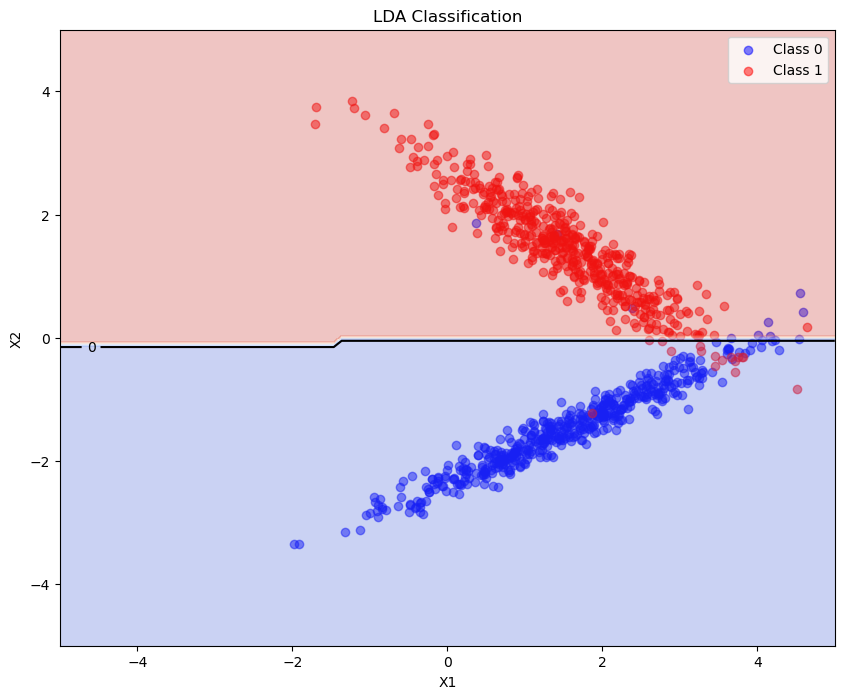

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# 生成随机数据集
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=1.5, random_state=42)

# 训练 LDA 分类器
lda = myLDA()
lda.fit(X, y)

# 预测
predictions = lda.predict(X)

# 可视化数据点和决策边界
xx = np.linspace(-5, 5, 100)
yy = np.linspace(-5, 5, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.dstack((XX, YY)).reshape(-1, 2)

# 预测网格上的点
Z = lda.predict(pp)
ZZ = Z.reshape(XX.shape)

plt.figure(figsize=(10, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', alpha=0.5, label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', alpha=0.5, label='Class 1')
plt.contourf(XX, YY, ZZ, alpha=0.3, cmap='coolwarm')

# 绘制决策边界
CS = plt.contour(XX, YY, ZZ, levels=[0], colors='black')
plt.clabel(CS, inline=1, fontsize=10)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('LDA Classification')
plt.legend()
plt.show()

### 5. Наивный байесовый классификатор (NaiveBayes)

**Задание** 
Прочитать по наивный байесовый подход можно здесь (https://scikit-learn.org/stable/modules/naive_bayes.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii).  

Суть наивного предположения состоит в том, чтобы не считать совместную плотность вероятности для $n$-мерного случая, а рассматривать каждую переменную как независимую и считать одномерные распределения:  
$$p(x_1,x_2,...,x_n|y) => \prod\limits_{i=1}^{n}p(x_i|y)$$  
Это можно также рассматривать как обнуление всех внедиагональных элементов матрицы ковариации.  

**Задание** 
Реализуйте классификатор на основе наивного байесового подхода с одномерным гауссовым распределением для каждой переменной. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```

In [20]:
import numpy as np
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        self.class_means = None
        self.class_vars = None
        self.priors = None

    def fit(self, X, y):
        # 获取类别数量
        classes = np.unique(y)
        n_classes = len(classes)
        n_features = X.shape[1]

        # 计算每个类别的均值向量和方差
        self.class_means = []
        self.class_vars = []
        for c in classes:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            var_c = np.var(X_c, axis=0)
            self.class_means.append(mean_c)
            self.class_vars.append(var_c)
        
        # 计算先验概率
        self.priors = []
        for c in classes:
            self.priors.append(np.mean(y == c))

    def predict(self, X):
        # 计算判别函数
        discriminant_values = []
        for i, x in enumerate(X):
            g_i = []
            for c in range(len(self.class_means)):
                mean_c = self.class_means[c]
                var_c = self.class_vars[c]
                prior_c = self.priors[c]

                # 计算判别函数值
                g_ic = np.sum(np.log(1 / np.sqrt(2 * np.pi * var_c)) - 0.5 * ((x - mean_c) ** 2) / var_c) + np.log(prior_c)
                g_i.append(g_ic)
            discriminant_values.append(g_i)

        # 预测类别
        predictions = np.argmax(discriminant_values, axis=1)
        return predictions

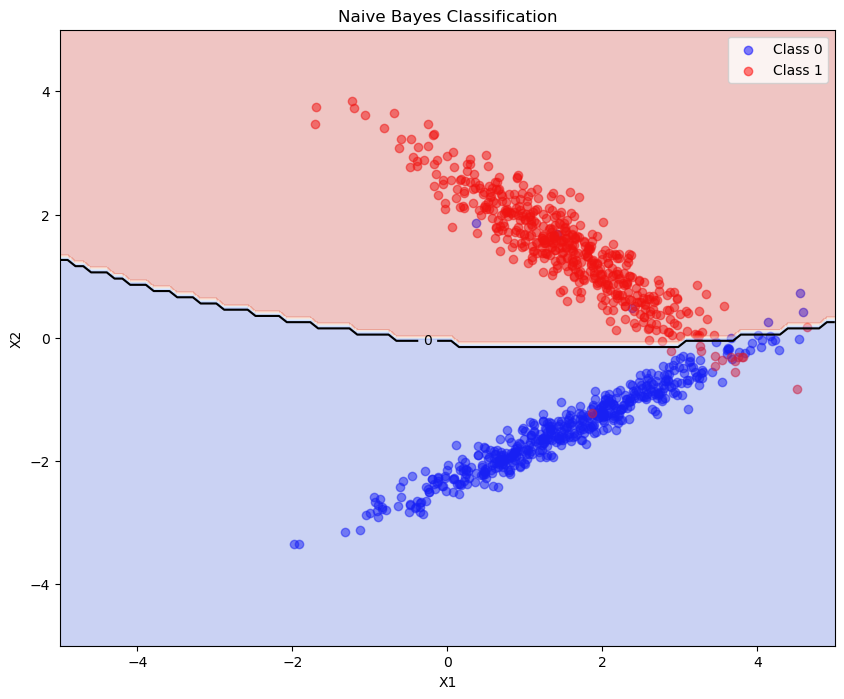

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# 生成随机数据集
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=1.5, random_state=42)

# 训练朴素贝叶斯分类器
nb = myNB()
nb.fit(X, y)

# 预测
predictions = nb.predict(X)

# 可视化数据点和决策边界
xx = np.linspace(-5, 5, 100)
yy = np.linspace(-5, 5, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.dstack((XX, YY)).reshape(-1, 2)

# 预测网格上的点
Z = nb.predict(pp)
ZZ = Z.reshape(XX.shape)

plt.figure(figsize=(10, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', alpha=0.5, label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', alpha=0.5, label='Class 1')
plt.contourf(XX, YY, ZZ, alpha=0.3, cmap='coolwarm')

# 绘制决策边界
CS = plt.contour(XX, YY, ZZ, levels=[0], colors='black')
plt.clabel(CS, inline=1, fontsize=10)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Naive Bayes Classification')
plt.legend()
plt.show()

### 6. Сравнение двух алгоритмов: LDA и NB

Создайте датасет для бинарной классификации, либо вручную либо используйте функцию `sklearn.datasets.make_classification`
(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)  

Разделите датасет на обучающую и тестовую подвыборки.  
Проверьте работоспособность разработанных вами двух алгоритмов.  
Посчитайте основные метрики классификации: долю правильных ответов (accuracy), точность (Precision) и полноту (Recall).  
(про метрики прочитайте здесь https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)  
Сделайте выводы.  

In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 生成随机数据集
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=1.5, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练和测试 LDA 分类器
lda = myLDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# 计算 LDA 的分类指标
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)

# 训练和测试 NB 分类器
nb = myNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# 计算 NB 的分类指标
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

# 打印结果
print("LDA Metrics:")
print(f"Accuracy: {accuracy_lda:.4f}")
print(f"Precision: {precision_lda:.4f}")
print(f"Recall: {recall_lda:.4f}\n")

print("Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")


LDA Metrics:
Accuracy: 0.9700
Precision: 0.9891
Recall: 0.9479

Naive Bayes Metrics:
Accuracy: 0.9750
Precision: 0.9892
Recall: 0.9583
